
## Heart Attack Risk Analysis: Youth vs Adults in Pakistan

# Project Objective
The objective of this project is to analyze and compare heart attack (cardiac arrest) risk between youth (<40 years) and adults (40+ years) in Pakistan by examining demographic, lifestyle, and clinical health factors.
The analysis aims to identify whether younger individuals exhibit early cardiovascular risk patterns traditionally associated with older populations, and to highlight the need for early prevention and public-health interventions.

# Project Summary

This project performs an exploratory data analysis (EDA) on a Pakistan-based heart health dataset to evaluate cardiac arrest prevalence across different age groups. The data is cleaned, preprocessed, and enhanced through feature engineering, including age-based grouping and binary outcome encoding.

The analysis compares cardiac arrest rates, lifestyle risk factors (smoking, diabetes, hypertension), and clinical indicators (BMI, cholesterol level, blood pressure, heart rate) between youth and adult populations. Visualizations and correlation analysis are used to uncover patterns and relationships among variables.

Key findings reveal that younger individuals show non-trivial cardiac arrest risk and comparable prevalence of major lifestyle-related risk factors, challenging the assumption that cardiovascular disease is primarily an older-age concern. The project concludes that preventive screening and lifestyle interventions should begin earlier, particularly in high-risk populations.

# 1. Import Librarie

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# 2. Load Dataset

In [ ]:

df = pd.read_csv("heart_attack_youth_vs_adult_pakistan.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (399994, 25)


,Age,Gender,Region,BMI,Smoker,Diabetes,Hypertension,Cholesterol_Level,Physical_Activity,Diet,...,Blood_Pressure,Heart_Rate,Chest_Pain,ECG_Results,Blood_Sugar,Angina,Cardiac_Arrest,Recovery_Status,Medication,Follow_Up
0,74,Female,Urban,32.1,Yes,Yes,Yes,111.5,Moderate,Healthy,...,162,52,No,Abnormal,102.0,No,Yes,Ongoing,Yes,Irregular
1,68,Male,Urban,38.3,Yes,Yes,No,276.3,High,Healthy,...,150,97,No,Normal,186.9,Yes,No,Deceased,Yes,Regular
2,50,Male,Urban,31.3,Yes,Yes,Yes,134.9,High,Unhealthy,...,98,67,Yes,Normal,71.4,No,Yes,Ongoing,No,NaN
3,29,Male,Urban,34.0,No,No,No,224.8,High,Healthy,...,99,87,No,Normal,191.0,No,No,Recovered,Yes,Regular
4,62,Male,Urban,25.1,No,No,No,128.0,Moderate,Healthy,...,128,89,No,Abnormal,184.1,Yes,No,Recovered,No,Irregular


# 3. Basic Data Inspection

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399994 entries, 0 to 399993
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  399994 non-null  int64  
 1   Gender               399994 non-null  object 
 2   Region               399994 non-null  object 
 3   BMI                  399994 non-null  float64
 4   Smoker               399994 non-null  object 
 5   Diabetes             399994 non-null  object 
 6   Hypertension         399994 non-null  object 
 7   Cholesterol_Level    399994 non-null  float64
 8   Physical_Activity    399994 non-null  object 
 9   Diet                 399994 non-null  object 
 10  Family_History       399994 non-null  object 
 11  Stress_Level         399994 non-null  object 
 12  Alcohol_Consumption  399994 non-null  object 
 13  Drug_Use             399994 non-null  object 
 14  Sleep_Hours          399994 non-null  int64  
 15  Blood_Pressure   

In [60]:
df.describe()

,Age,BMI,Cholesterol_Level,Sleep_Hours,Blood_Pressure,Heart_Rate,Blood_Sugar
count,399994.000000,399994.000000,399994.000000,399994.000000,399994.000000,399994.000000,399994.000000
mean,47.481772,27.532449,200.142307,6.498307,134.936457,85.022293,135.088672
std,19.070708,7.205656,57.785064,2.296341,26.228284,20.514181,37.468079
min,15.000000,15.000000,100.000000,3.000000,90.000000,50.000000,70.000000
25%,31.000000,21.300000,150.000000,4.000000,112.000000,67.000000,102.700000
50%,47.000000,27.500000,200.200000,6.000000,135.000000,85.000000,135.100000
75%,64.000000,33.800000,250.300000,9.000000,158.000000,103.000000,167.500000
max,80.000000,40.000000,300.000000,10.000000,180.000000,120.000000,200.000000


# 4. Data Cleaning

In [ ]:
# Check missing values

print(df.isnull().sum())

Age                         0
Gender                      0
Region                      0
BMI                         0
Smoker                      0
Diabetes                    0
Hypertension                0
Cholesterol_Level           0
Physical_Activity           0
Diet                        0
Family_History              0
Stress_Level                0
Alcohol_Consumption         0
Drug_Use                    0
Sleep_Hours                 0
Blood_Pressure              0
Heart_Rate                  0
Chest_Pain                  0
ECG_Results                 0
Blood_Sugar                 0
Angina                      0
Cardiac_Arrest              0
Recovery_Status             0
Medication                  0
Follow_Up              133631
dtype: int64


In [62]:
# Fill missing categorical values with 'Unknown'

categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

In [82]:
# Fill missing numeric values with median

numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


In [81]:
df.head()

,Age,Gender,Region,BMI,Smoker,Diabetes,Hypertension,Cholesterol_Level,Physical_Activity,Diet,...,Chest_Pain,ECG_Results,Blood_Sugar,Angina,Cardiac_Arrest,Recovery_Status,Medication,Follow_Up,Age_Group,Cardiac_Arrest_Binary
0,74,Female,Urban,32.1,Yes,Yes,Yes,111.5,Moderate,Healthy,...,No,Abnormal,102.0,No,Yes,Ongoing,Yes,Irregular,Adult (40+),1
1,68,Male,Urban,38.3,Yes,Yes,No,276.3,High,Healthy,...,No,Normal,186.9,Yes,No,Deceased,Yes,Regular,Adult (40+),0
2,50,Male,Urban,31.3,Yes,Yes,Yes,134.9,High,Unhealthy,...,Yes,Normal,71.4,No,Yes,Ongoing,No,Unknown,Adult (40+),1
3,29,Male,Urban,34.0,No,No,No,224.8,High,Healthy,...,No,Normal,191.0,No,No,Recovered,Yes,Regular,Youth (<40),0
4,62,Male,Urban,25.1,No,No,No,128.0,Moderate,Healthy,...,No,Abnormal,184.1,Yes,No,Recovered,No,Irregular,Adult (40+),0


# 5. Feature Engineering

In [64]:
# Create Age Group

df['Age_Group'] = np.where(df['Age'] < 40, 'Youth (<40)', 'Adult (40+)')

In [65]:
# Encode target variable

df['Cardiac_Arrest_Binary'] = df['Cardiac_Arrest'].map({'Yes':1, 'No':0})

df[['Age', 'Age_Group']].head()

,Age,Age_Group
0,74,Adult (40+)
1,68,Adult (40+)
2,50,Adult (40+)
3,29,Youth (<40)
4,62,Adult (40+)


# 6. Age Distribution

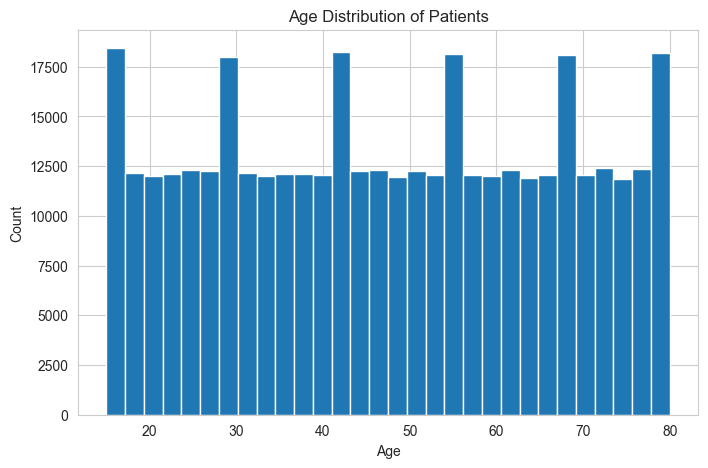

In [66]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Patients")
plt.show()

# 7. Cardiac Arrest Rate by Age Group

Cardiac_Arrest        No       Yes
Age_Group                         
Adult (40+)     0.501491  0.498509
Youth (<40)     0.496922  0.503078


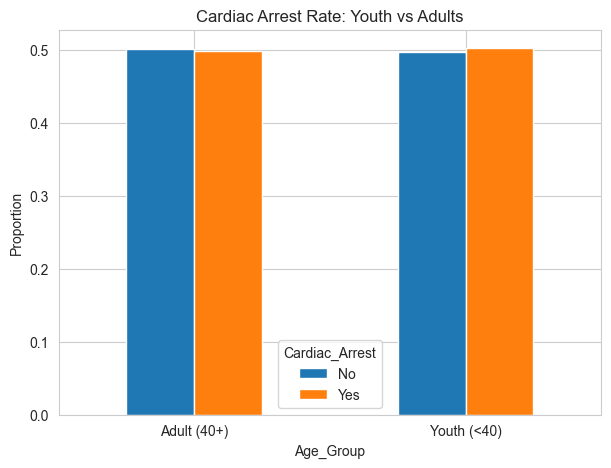

In [67]:
cardiac_rate = (
    df.groupby('Age_Group')['Cardiac_Arrest']
    .value_counts(normalize=True)
    .unstack()
)

print(cardiac_rate)

cardiac_rate.plot(kind='bar', figsize=(7,5))
plt.ylabel("Proportion")
plt.title("Cardiac Arrest Rate: Youth vs Adults")
plt.xticks(rotation=0)
plt.show()

# 8. Risk Factor Prevalence

               Smoker  Diabetes  Hypertension
Age_Group                                    
Adult (40+)  0.500916  0.500545      0.499483
Youth (<40)  0.500953  0.500241      0.500518


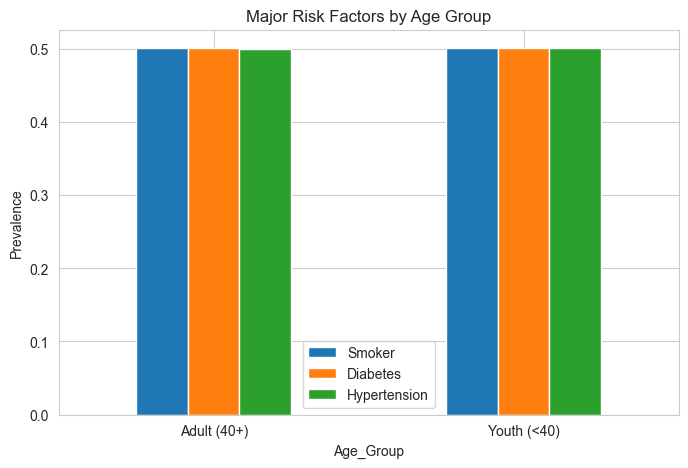

In [68]:
risk_factors = ['Smoker', 'Diabetes', 'Hypertension']

risk_prevalence = df.groupby('Age_Group')[risk_factors] \
    .apply(lambda x: (x == 'Yes').mean())

print(risk_prevalence)

risk_prevalence.plot(kind='bar', figsize=(8,5))
plt.ylabel("Prevalence")
plt.title("Major Risk Factors by Age Group")
plt.xticks(rotation=0)
plt.show()

# 9. Clinical Indicators Comparison

                   BMI  Cholesterol_Level  Blood_Pressure  Heart_Rate
Age_Group                                                            
Adult (40+)  27.543744         200.201668      134.882869   85.010019
Youth (<40)  27.513934         200.045007      135.024294   85.042411


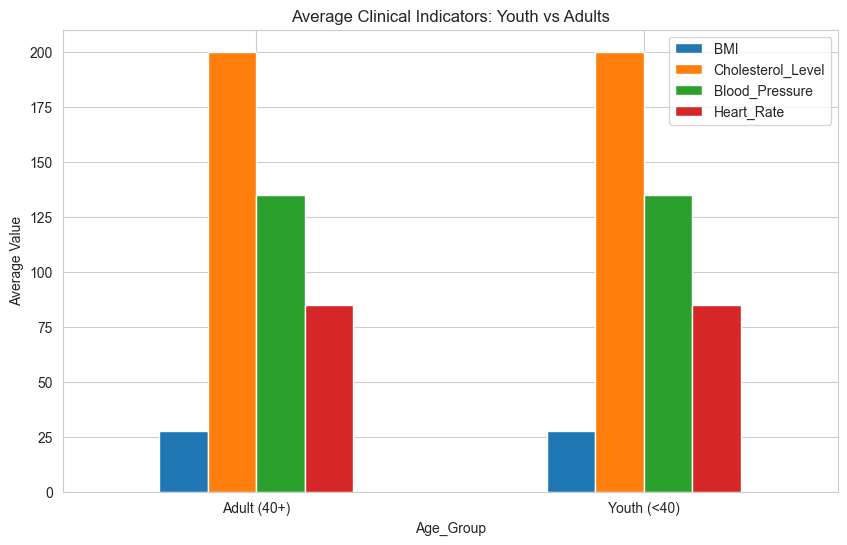

In [69]:
clinical_features = [
    'BMI',
    'Cholesterol_Level',
    'Blood_Pressure',
    'Heart_Rate'
]

clinical_summary = df.groupby('Age_Group')[clinical_features].mean()
print(clinical_summary)

clinical_summary.plot(kind='bar', figsize=(10,6))
plt.ylabel("Average Value")
plt.title("Average Clinical Indicators: Youth vs Adults")
plt.xticks(rotation=0)
plt.show()

# 10. Gender-Based Cardiac Arrest Analysis

Cardiac_Arrest        No       Yes
Gender                            
Female          0.498300  0.501700
Male            0.501224  0.498776


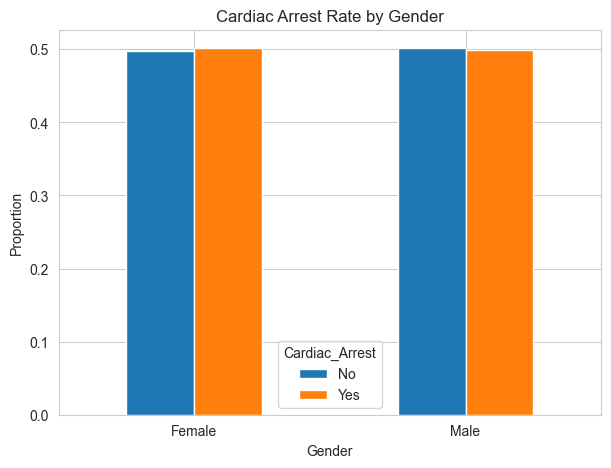

In [70]:
gender_analysis = pd.crosstab(
    df['Gender'],
    df['Cardiac_Arrest'],
    normalize='index'
)

print(gender_analysis)

gender_analysis.plot(kind='bar', figsize=(7,5))
plt.ylabel("Proportion")
plt.title("Cardiac Arrest Rate by Gender")
plt.xticks(rotation=0)
plt.show()

# 11. Correlation Analysis

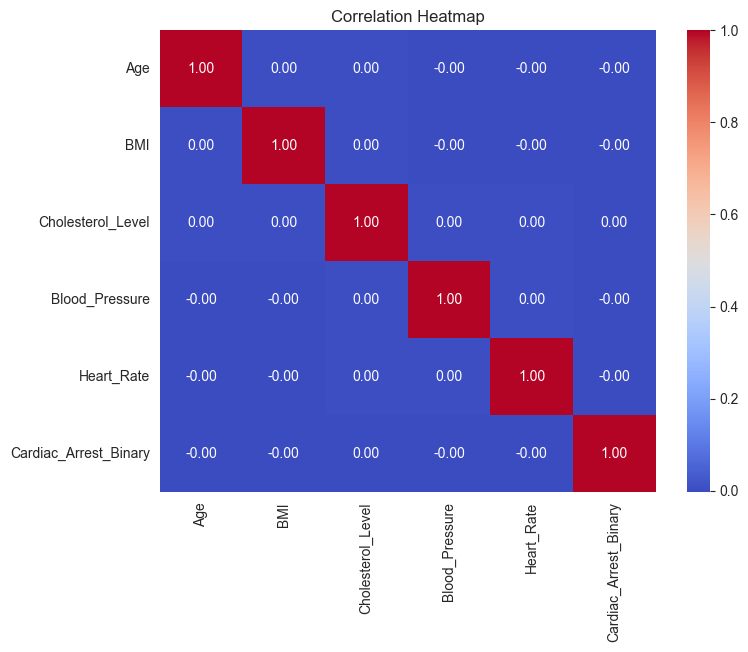

In [71]:
corr_features = [
    'Age', 'BMI', 'Cholesterol_Level',
    'Blood_Pressure', 'Heart_Rate',
    'Cardiac_Arrest_Binary'
]

plt.figure(figsize=(8,6))
sns.heatmap(
    df[corr_features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()


# 12 Key Insights

1. Youth (<40) show cardiac arrest rates comparable to adults.
2. Lifestyle risk factors such as smoking, diabetes, and hypertension are equally prevalent in younger populations.
3. Clinical indicators like BMI and cholesterol levels are similar across age groups, suggesting early cardiovascular risk.
4. Preventive interventions should target younger populations as well.